In [1]:
import anal as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend


import locale
locale.setlocale(locale.LC_ALL, 'de_DE.utf8')
plt.rcParams['axes.formatter.use_locale'] = True

In [2]:
f = pm.bridge_tests()

In [3]:
f.load()
f.preprocess()
for ff in f:
    ff.collect_merge()

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8


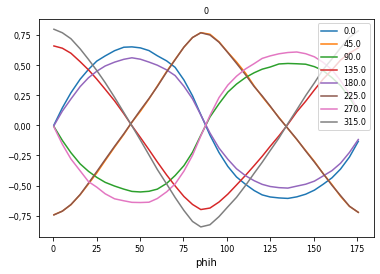

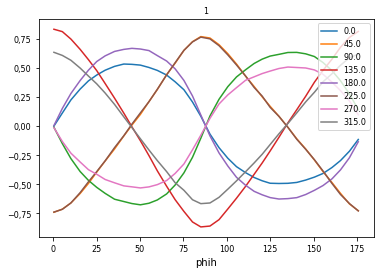

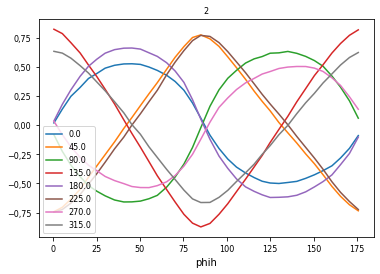

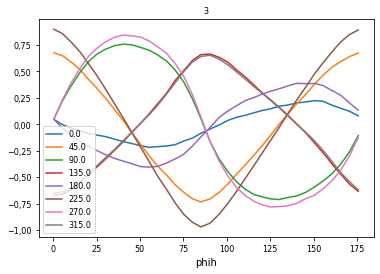

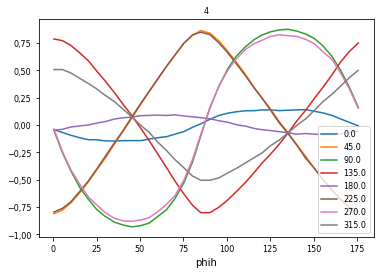

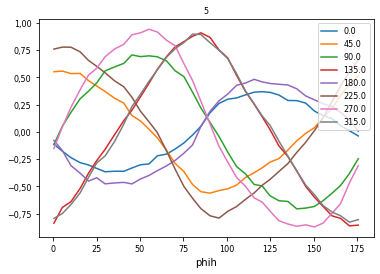

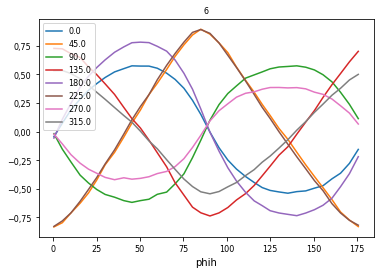

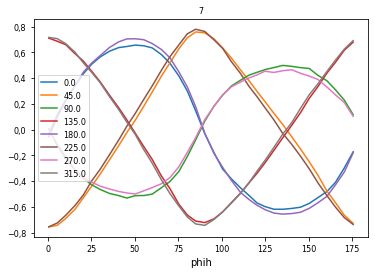

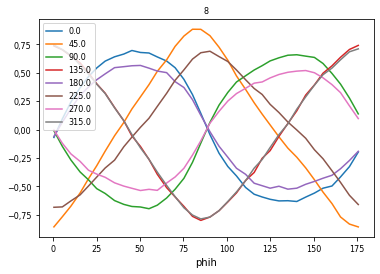

In [4]:
for i,ff in enumerate(f):
    ff.plot_all()
    plt.title(i)

In [5]:
# x1, 0: zero order
# x2, 1: best
# x3, 2: bez polarizatoru
# x4, 3: 1 zrcadlo
# x5, 4: 2 zrcadla
# x6, 5: fixni berek ori 1.75 ret 7.5 nestabilni
# x7, 6: fixni berek ori 271.75 ret 2.5
# x8, 7: dynamicky berek ori 271 ret 2.2
# x9, 8: zkrizena

In [6]:
f.process()

processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8


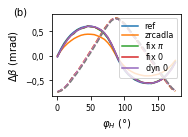

In [7]:
fig, ax = plt.subplots(figsize=(2.5,1.8),constrained_layout=True)

sign = [1,1,1,1,1,-1,1,1,1]
labels = ['0ord','ref','nopol','1z','zrcadla',r'fix $\pi$',r'fix $0$','dyn $0$','zkriz']
cols = ['C'+str(i) for i in range(9)]
def pl(i, c=None):
    if c==None: c=cols[i]
    ax.plot(f[i].data['phih'], sign[i]*f[i].data[0.], linestyle='solid', label=labels[i], color=c)
    ax.plot(f[i].data['phih'], sign[i]*f[i].data[45.], linestyle='dashed', color=cols[i])
    
pl(1,'C0')
pl(4,'C1')
pl(5,'C2')
pl(6,'C3')
pl(7,'C4')

ax.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax.set_ylabel(r'$\Delta\beta$ (mrad)')

ax.legend(loc='upper right', labelspacing=0)

ax.text(-0.3, 1, "(b)", transform=ax.transAxes)


fig.savefig('out/pem-data.pdf')